#### Poojitha Venkatram

#### Assignment 4 Part-1

#### https://github.com/poojithavenkatram/Deep-Learning

In [ ]:
# Installing Ultratyics

!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 4.4 MB/s eta 0:00:00


In [ ]:
! pip install opencv-python

In [ ]:
import cv2
print(cv2.__version__)

4.8.0


In [ ]:
import cv2
import os

def extract_frames(video_path, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        print(f"Created directory: {output_dir}")

    # Start capturing the video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    frame_count = 0

    while True:
        # Read frame by frame
        ret, frame = cap.read()

        # If frame is read correctly ret is True
        if not ret:
            print("Reached end of video or encountered an error. Exiting.")
            break

        # Construct the output frame path
        frame_path = os.path.join(output_dir, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_path, frame)
        print(f"Saved frame {frame_count} to: {frame_path}")
        frame_count += 1

    cap.release()
    print("Finished extracting frames.")

# Paths
video_path = '/Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/video.mp4'
output_dir = '/Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames'

# Extract frames
extract_frames(video_path, output_dir)

Saved frame 0 to: /Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0000.jpg
Saved frame 1 to: /Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0001.jpg
Saved frame 2 to: /Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0002.jpg
Saved frame 3 to: /Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0003.jpg
Saved frame 4 to: /Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0004.jpg
Saved frame 5 to: /Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0005.jpg
Saved frame 6 to: /Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0006.jpg
Saved frame 7 to: /Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0007.jpg
Saved frame 8 to: /Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0008.jpg
Saved frame 9 to: /Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0009.jpg
Saved frame 10 to: /Users/poojithavenkat

In [ ]:
!zip -r frames.zip '/Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames'

  adding: Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/ (stored 0%)
  adding: Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0002.jpg (deflated 0%)
  adding: Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0405.jpg (deflated 0%)
  adding: Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0229.jpg (deflated 0%)
  adding: Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0300.jpg (deflated 0%)
  adding: Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0020.jpg (deflated 0%)
  adding: Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0116.jpg (deflated 0%)
  adding: Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0414.jpg (deflated 0%)
  adding: Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0283.jpg (deflated 0%)
  adding: Users/poojithavenkatram/Desktop/Poojitha_Venkatram_HW4/frames/frame_0452.jpg (deflated 0%)
  addi

In [ ]:
from google.colab import files
files.download('frames.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Splitting the manually labelled data into train, test and validation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Base path to Google Drive folder
base_path = '/content/drive/My Drive/Manually Labelled Images'

# Paths to images and labels within the Google Drive folder
src_images = os.path.join(base_path, 'images')
src_labels = os.path.join(base_path, 'labels')

# Destination base path within the Google Drive for the split dataset
dest_base = os.path.join(base_path, 'dataset')

# Getting a list of filenames without extension
filenames = [os.path.splitext(f)[0] for f in os.listdir(src_images) if os.path.isfile(os.path.join(src_images, f))]

# Splitting filenames into train, val, and test
train_files, test_files = train_test_split(filenames, test_size=0.2, random_state=42)  # 80% train, 20% for val+test
val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)  # Splitting the remaining 20% into 10% val, 10% test

# Function to copy files
def copy_files(files, src_images, src_labels, dest_images, dest_labels):
    for f in files:
        shutil.copy(os.path.join(src_images, f + '.jpg'), dest_images)
        shutil.copy(os.path.join(src_labels, f + '.txt'), dest_labels)

# Execute copying
for split in [('train', train_files), ('val', val_files), ('test', test_files)]:
    dest_images = os.path.join(dest_base, split[0], 'images')
    dest_labels = os.path.join(dest_base, split[0], 'labels')
    os.makedirs(dest_images, exist_ok=True)
    os.makedirs(dest_labels, exist_ok=True)
    copy_files(split[1], src_images, src_labels, dest_images, dest_labels)

## Implementing object detection with YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg'

100% 6.23M/6.23M [00:00<00:00, 247MB/s]

2024-02-26 07:21:16.591402: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 07:21:16.591454: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 07:21:16.593408: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 07:21:17.827295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 59.6MB/s]
image 1/1 /conten

## Custom Training

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir -p "/content/drive/MyDrive/My Courses/YOLOv8"

%cd /content/drive/MyDrive/My Courses/YOLOv8

/content/drive/MyDrive/My Courses/YOLOv8


In [ ]:
%cd "/content/drive/MyDrive/My Courses/YOLOv8"
!yolo task=train mode=train model=yolov8s.pt data='/content/drive/MyDrive/My Courses/YOLOv8/Manually Labelled Images/dataset/data.yaml' epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/My Courses/YOLOv8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/drive/MyDrive/My Courses/YOLOv8/Manually Labelled Images/dataset/data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, 

###### Overall Performance: The model has a precision of 84.4% and a recall of 31.2%, with a mean Average Precision (mAP) at IoU=0.5 of 32.7% and mAP at IoU=0.5:0.95 of 23.3%. These metrics provide a comprehensive view of the model's performance, with precision indicating the accuracy of positive predictions, recall showing how well the model can find all positive samples, and mAP offering an overall measure of the model's ability to detect objects across different thresholds.
######- Class-wise Performance:
  - Car: High precision (90.2%) and perfect recall (100%), leading to a nearly perfect mAP50 of 99.5% and mAP50-95 of 85.6%. This indicates the model is very effective at detecting cars in your dataset.
  - Pedestrian: Lower precision (47.4%) and recall (25%), with a mAP50 of 24.6% and much lower mAP50-95 of 4.92%. This suggests the model struggles more with detecting pedestrians, possibly due to their smaller size or varied appearances.
  -Bus: The model did not correctly detect any bus instances despite having a precision of 100%, which indicates false confidence in non-existing detections since recall is 0%, leading to a mAP50 and mAP50-95 of 0%. This could suggest the need for more varied or additional training data for buses.
  - Crosswalk: Similar to buses, the model shows a precision of 100% but with a recall of 0%, indicating it's falsely confident in its predictions. The low mAP50 of 6.8% and mAP50-95 of 2.51% further confirm the model's difficulty in accurately detecting crosswalks.

##### The results are saved in `runs/detect/train7`, including the optimized model weights (`last.pt` and `best.pt`). These files are essential for deploying the model or for further validation and testing on new data.

In [ ]:
!ls runs/detect/train7

args.yaml					     R_curve.png       train_batch45.jpg
confusion_matrix.png				     results.csv       train_batch46.jpg
events.out.tfevents.1708935212.25ec6b389dd9.21115.0  results.png       train_batch47.jpg
F1_curve.png					     train_batch0.jpg  val_batch0_labels.jpg
P_curve.png					     train_batch1.jpg  val_batch0_pred.jpg
PR_curve.png					     train_batch2.jpg  weights


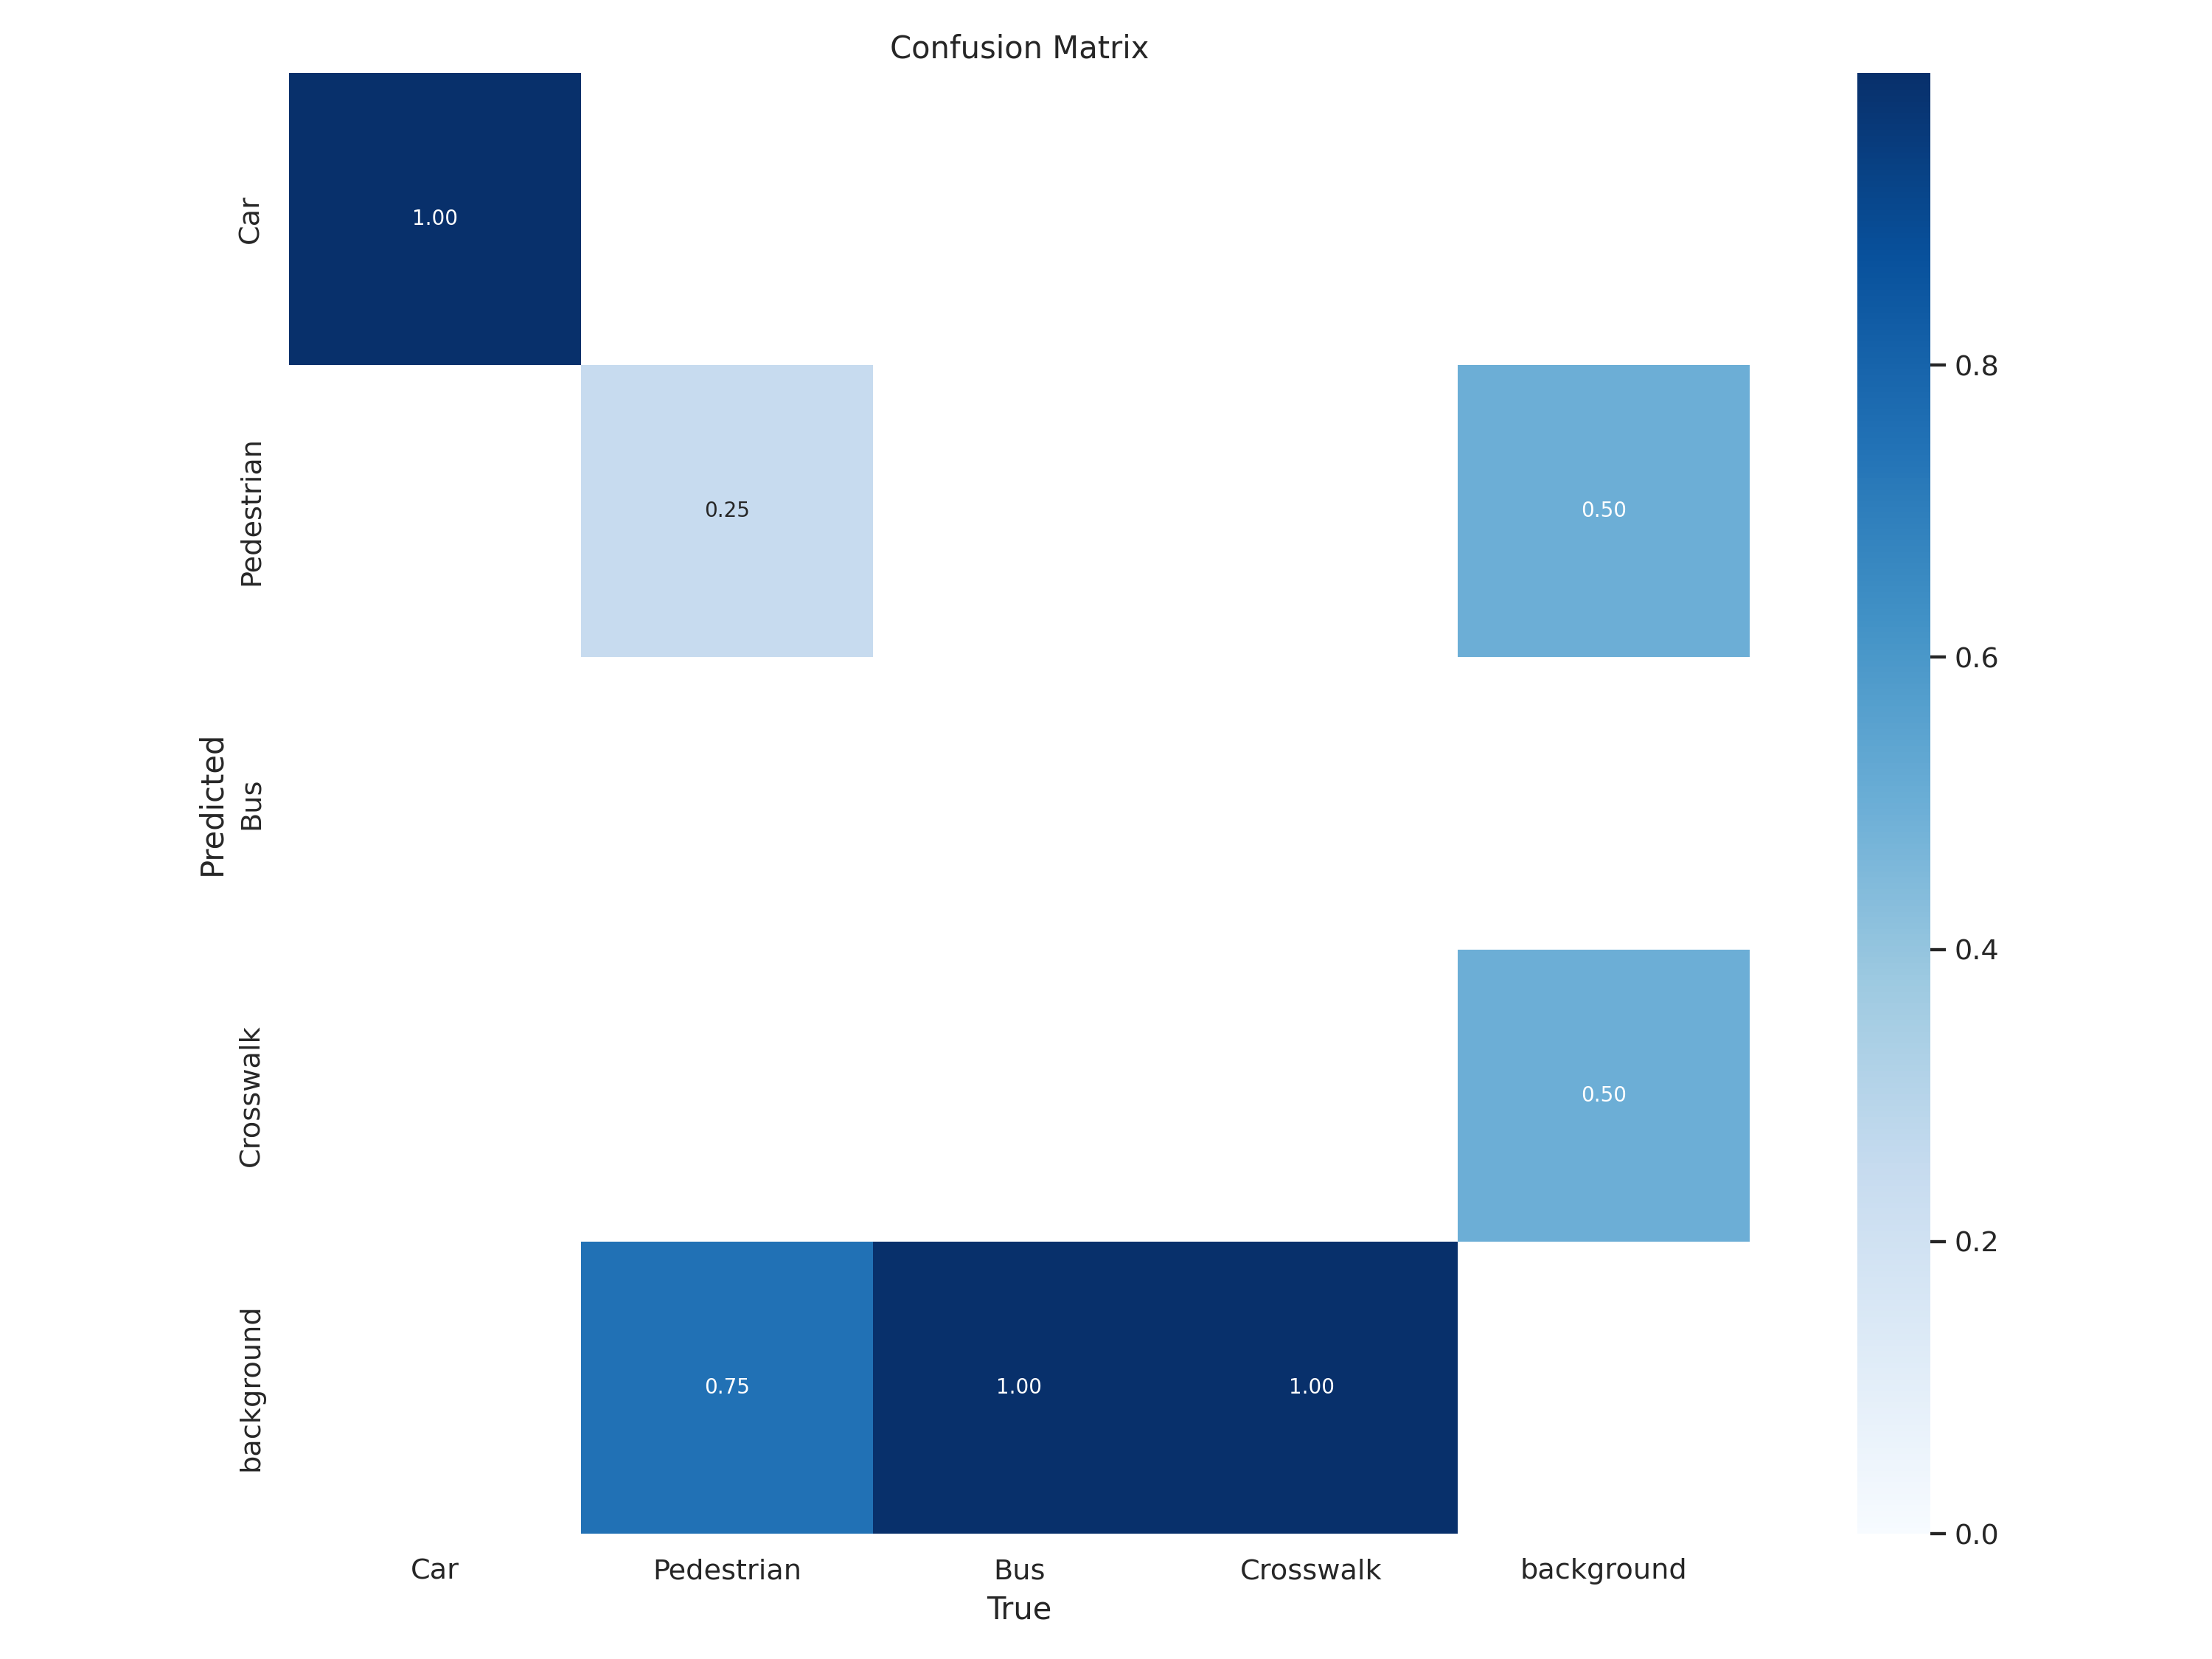

In [ ]:
Image(filename='runs/detect/train7/confusion_matrix.png', width=600)

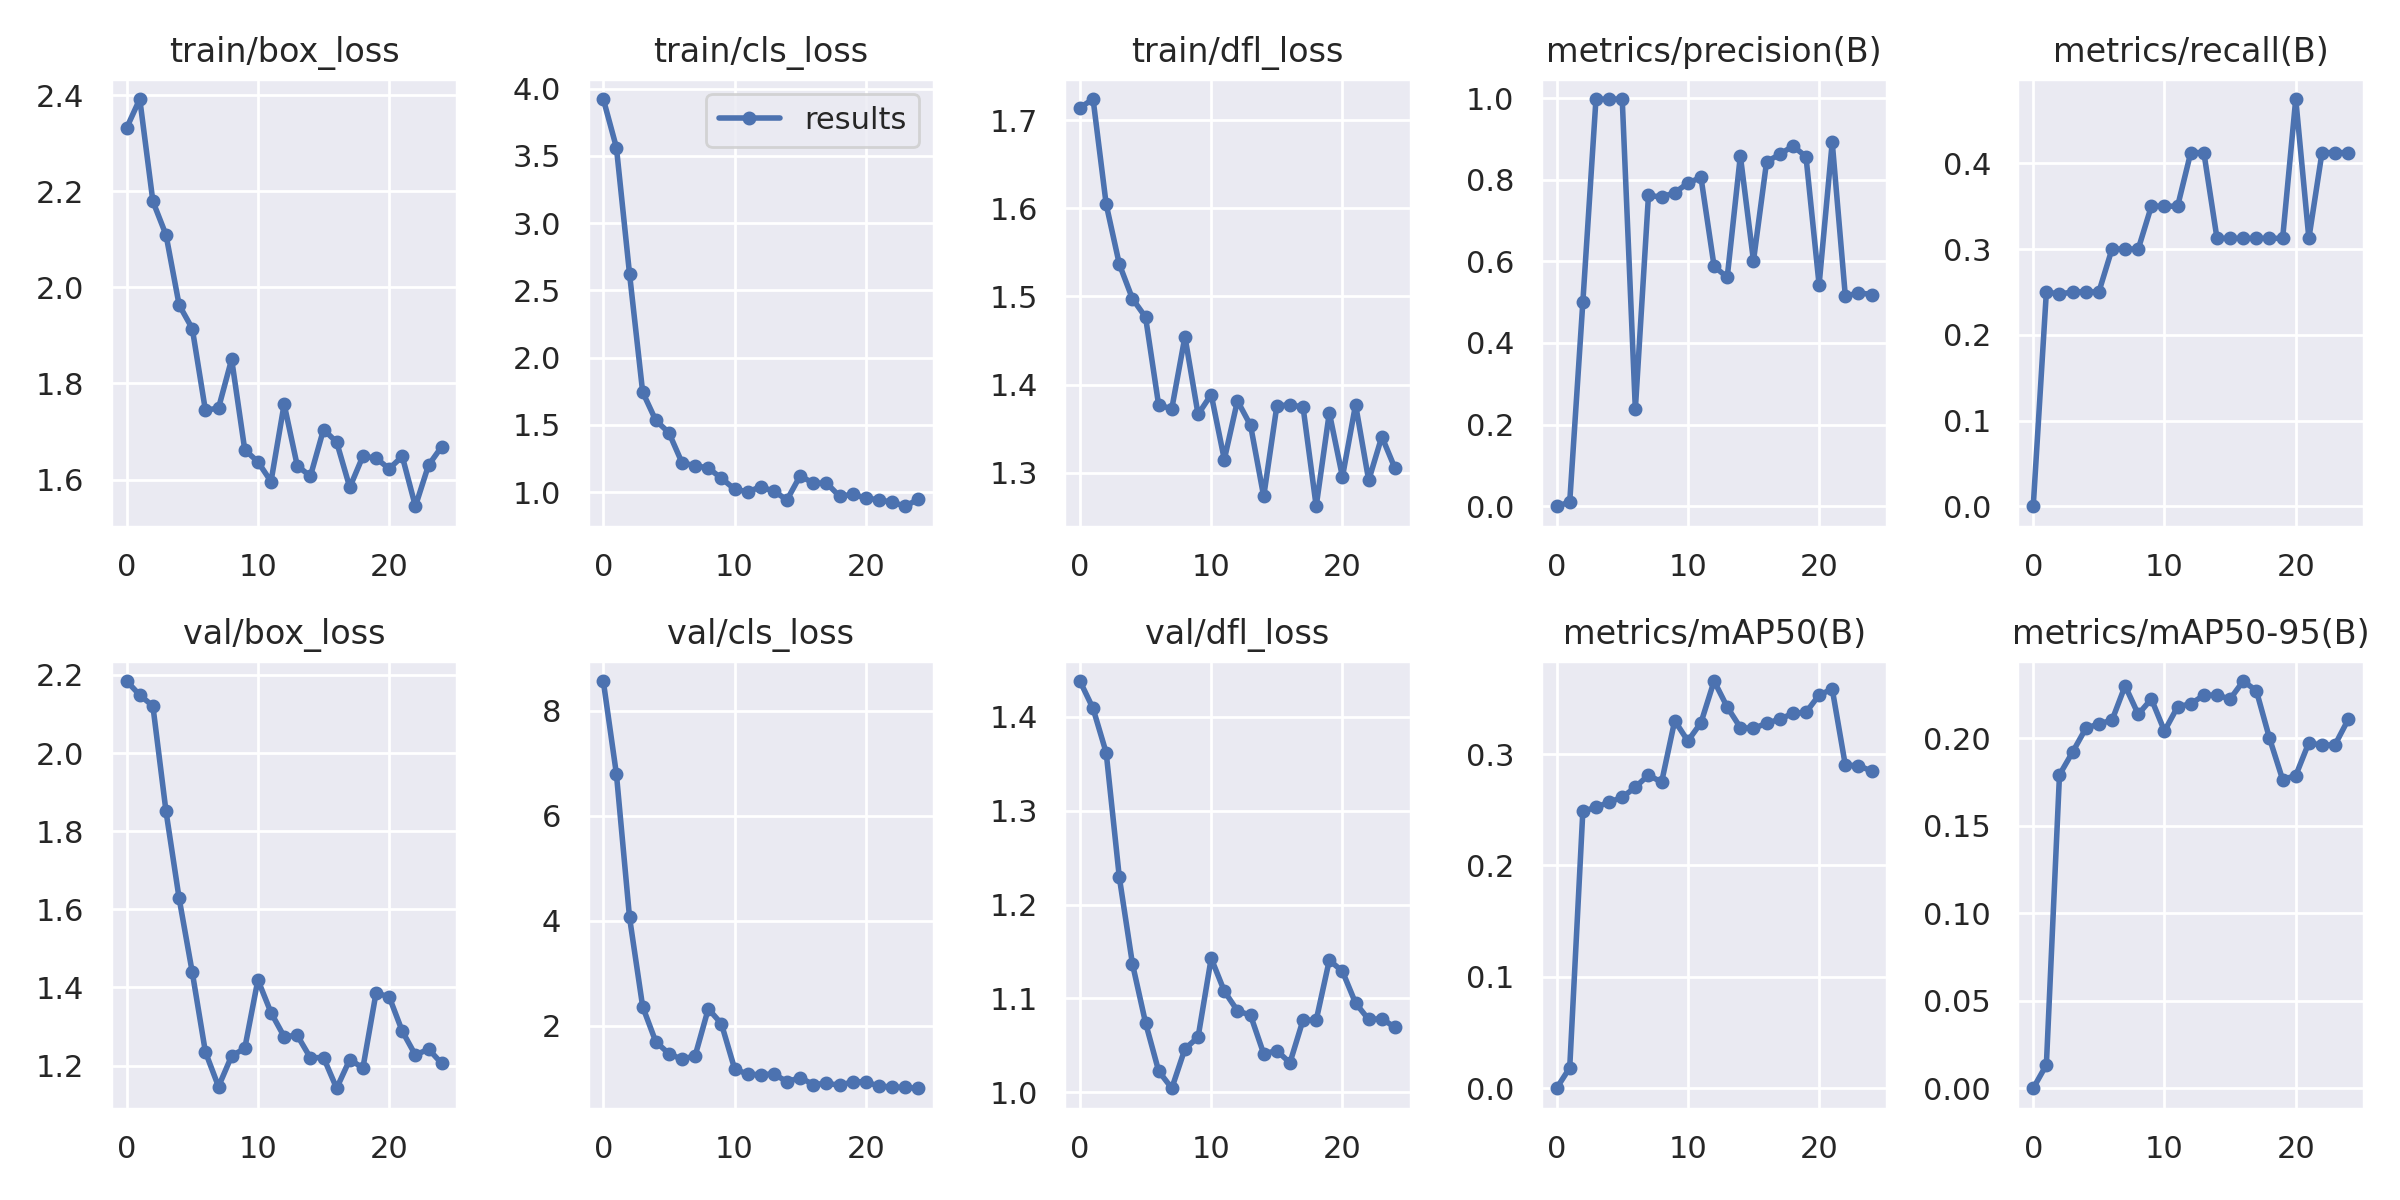

In [ ]:
Image(filename='runs/detect/train7/results.png', width=600)

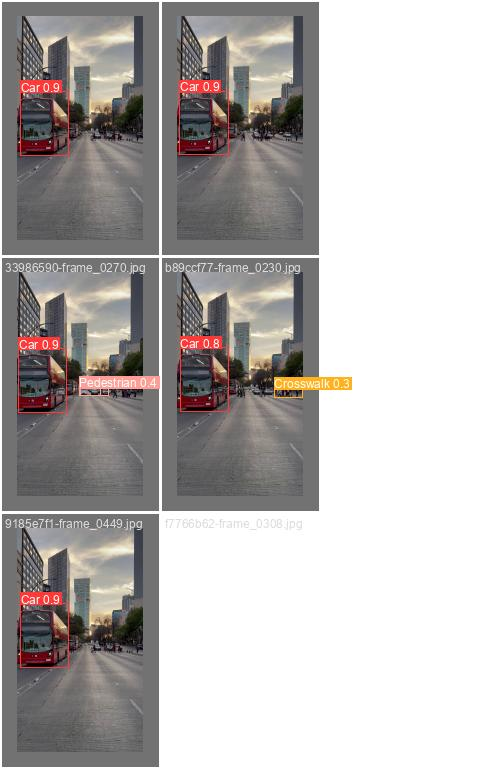

In [ ]:
Image(filename='runs/detect/train7/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train7/weights/best.pt data='/content/drive/MyDrive/My Courses/YOLOv8/Manually Labelled Images/dataset/data.yaml'

2024-02-26 08:32:09.839370: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 08:32:09.839435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 08:32:09.841050: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 08:32:11.127325: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/My Courses/YOLOv8/Manually Labelled Images/dataset/val/label

##### The validation results of the YOLO model shows,

##### - The Car class shows high precision (0.902) and a perfect recall (1.0), resulting in a high mAP50 (0.995) and mAP50-95 (0.856), indicating good performance in detecting cars.
##### - The Pedestrian class has lower precision (0.474) and recall (0.25), with correspondingly lower mAP50 (0.246) and mAP50-95 (0.0492), suggesting challenges in detecting pedestrians accurately.
##### - The Bus and Crosswalk classes have a precision of 1 but a recall of 0, indicating that while the model is highly confident in its predictions when it makes them, it fails to detect any actual instances of these classes. This results in a mAP50 and mAP50-95 of 0 for Bus and very low for Crosswalk, showing that the model struggles significantly with these classes.

##### Overall, the model shows an average performance but has considerable room for improvement, especially in detecting buses, cars and crosswalks. Improving the dataset size, diversity, and possibly tweaking model parameters or architecture could help enhance performance across all classes.

## Inference with Custom Model

In [ ]:
import os

directory = "/content/drive/MyDrive/My Courses/YOLOv8/Manually Labelled Images/dataset/test"
contents = os.listdir(directory)
print(contents)

['images', 'labels']


In [ ]:
!ls /content/drive/MyDrive/My\ Courses/YOLOv8/Manually\ Labelled\ Images/dataset/test/images

2dbd0f22-frame_0457.jpg  8288e017-frame_0235.jpg  8da06358-frame_0405.jpg
2df4010d-frame_0250.jpg  87d81238-frame_0186.jpg  a82033c5-frame_0261.jpg


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train7/weights/best.pt conf=0.25 source='/content/drive/MyDrive/My Courses/YOLOv8/Manually Labelled Images/dataset/test/images'

2024-02-26 08:47:39.336088: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 08:47:39.336163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 08:47:39.337969: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-26 08:47:40.791771: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
image 1/6 /content/drive/MyDrive/My Courses/YOLOv8/Manually Labelled Images/dataset/test/images/2

**NOTE:** Let's take a look at few results.

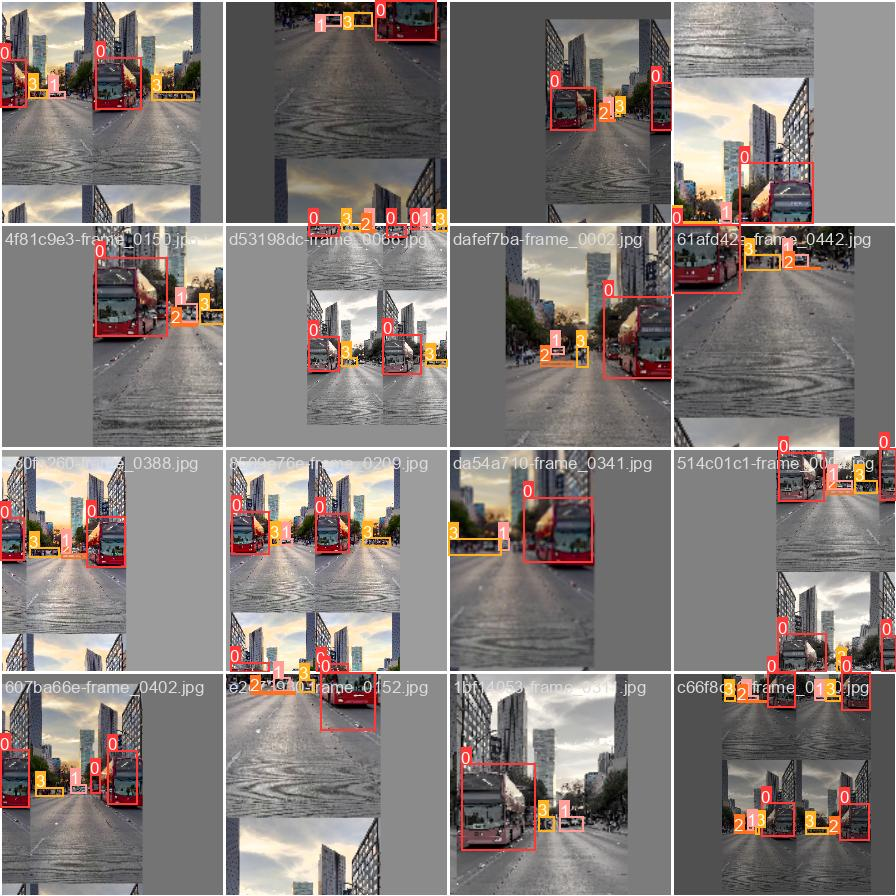

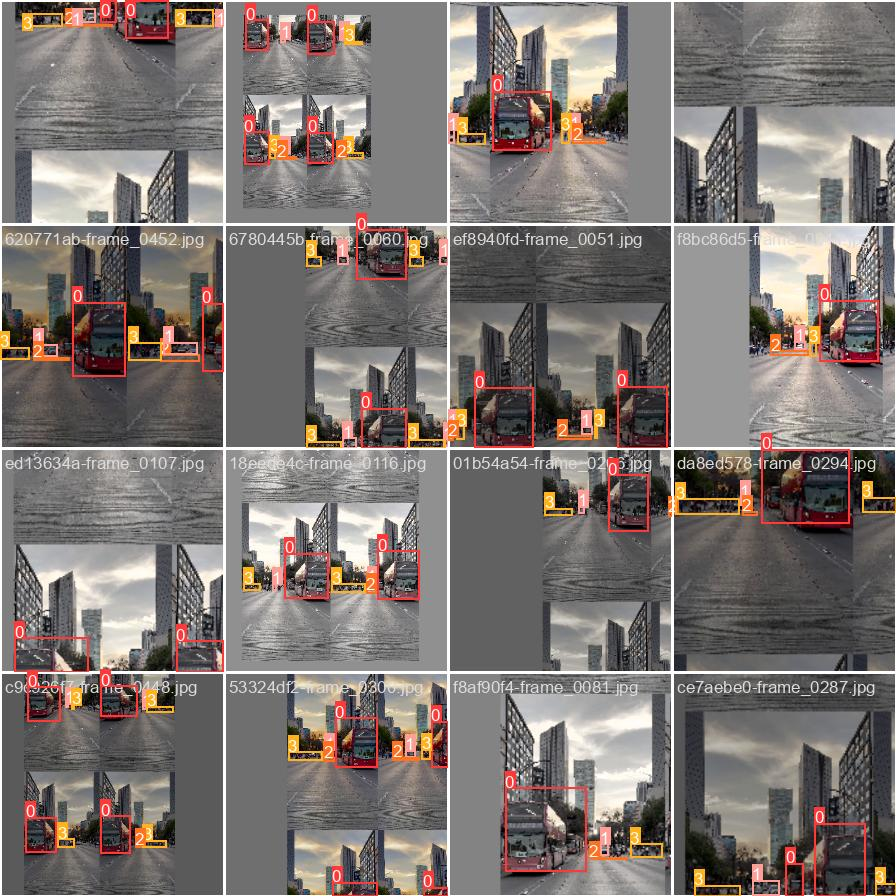

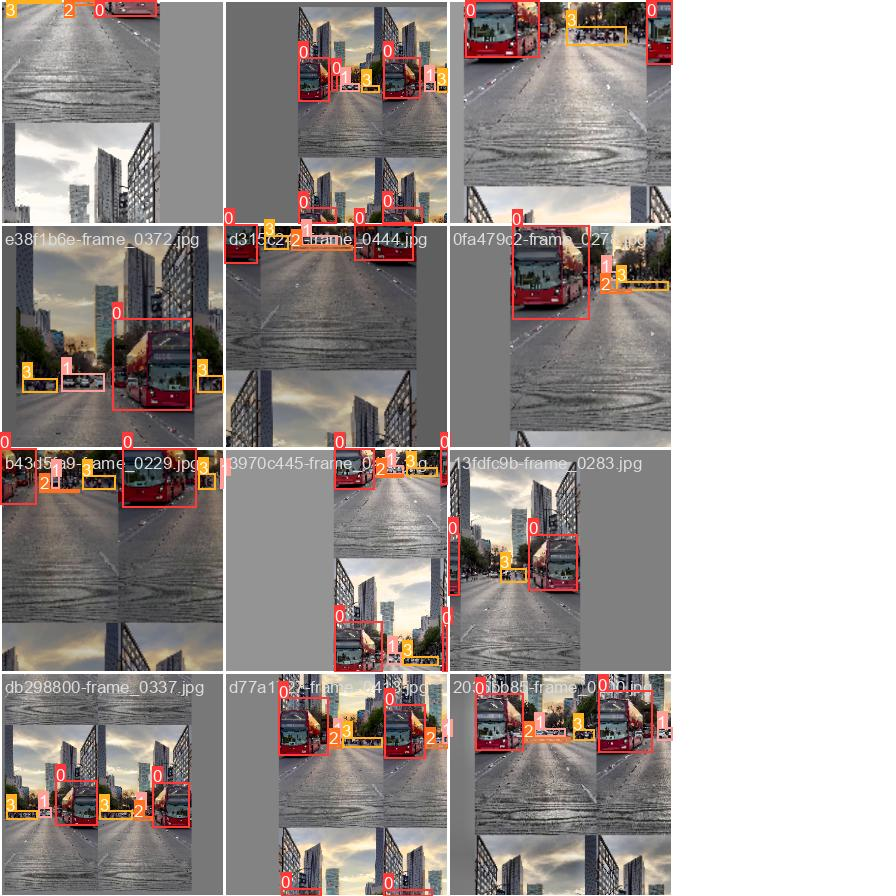

In [ ]:
import glob
from IPython.display import Image, display

# Specifying the path where the detection result images are stored
result_images_path = '/content/drive/MyDrive/My Courses/YOLOv8/runs/detect/train7/*.jpg'

# Getting a list of paths for the result images
result_image_paths = glob.glob(result_images_path)[:3]

# Displaying each result image
for image_path in result_image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

##### The model's current performance is not fully optimal, as it was trained on a limited dataset of only 55 image frames that were manually annotated. However, it is anticipated that its predictive accuracy will significantly improve with the incorporation of a larger dataset.

In [ ]:
import cv2
import glob

# Directory containing the detection result images
result_images_path = '/content/drive/MyDrive/My Courses/YOLOv8/runs/detect/train7/*.jpg'

# Getting the list of result image paths
result_image_paths = sorted(glob.glob(result_images_path))

# Initializing video writer
video_output_path = '/content/drive/MyDrive/My Courses/YOLOv8/runs/detect/train7/detection_results.mp4'
frame_size = (1920, 1080)  # Adjust as needed
fps = 30
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(video_output_path, fourcc, fps, frame_size)

# Writing the images to video
for image_path in result_image_paths:
    img = cv2.imread(image_path)
    video_writer.write(img)

# Releasing the video writer
video_writer.release()

print("Video created successfully.")

Video created successfully.
